In [58]:
#conexión a la cuenta de drive a la raiz de archivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
%matplotlib inline

In [60]:
import pandas as pd

##EXPLORACIÓN DE LOS DATOS

In [61]:
#cargamos el dataframe, con el archivo .csv generado en la limpieza
compras_df=pd.read_csv("/content/drive/MyDrive/Maestria CIENCIA DE DATOS/Inteligencia Artificial/Unidad 2/Tarea grupo/notebooks/data/clean_compras_2016.csv")

In [62]:
compras_df.head(4)

,FECHA,FACTURA,NOMBRE,RFC,CONCEPTO,IMPORTE,SHEET
0,2016-01-30 00:00:00,B139-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,23.2,CONTRATISTAS
1,2016-01-30 00:00:00,B162-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.4,CONTRATISTAS
2,2016-01-30 00:00:00,B166-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.4,CONTRATISTAS
3,2016-01-30 00:00:00,B182-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,295.8,CONTRATISTAS


### a. Visión General del Dataset

In [63]:
#Visualizamos las columnas resultantes del proceso de limpieza
compras_df.columns

Index(['FECHA', 'FACTURA', 'NOMBRE', 'RFC', 'CONCEPTO', 'IMPORTE', 'SHEET'], dtype='object')

In [64]:
# Tipo de datos por columna
compras_df.dtypes

,0
FECHA,object
FACTURA,object
NOMBRE,object
RFC,object
CONCEPTO,object
IMPORTE,float64
SHEET,object


In [65]:
#Describir los datos
#(En este caso solo obtendremos los resultados de la columna 'IMPORTE' que es de tipo float)
compras_df.describe()

,IMPORTE
count,1.673800e+04
mean,2.830771e+05
std,1.973514e+06
min,3.000000e+00
25%,3.300000e+03
50%,1.407581e+04
75%,5.878267e+04
max,1.144752e+08


In [66]:
#No es necesario crear otro dataframe con las columnas a utilizarse, dado que en el proceso de limpieza ya fueron seleccionadas
#Sin embargo se establecerá el siguiente orden
compras_df=compras_df[['NOMBRE','CONCEPTO','FACTURA','RFC','FECHA','IMPORTE','SHEET']]

In [67]:
compras_df.head(4)

,NOMBRE,CONCEPTO,FACTURA,RFC,FECHA,IMPORTE,SHEET
0,MUNICIPIO DE LA CIUDAD DE MONTERREY,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,B139-12-2015,MCM610101PT2,2016-01-30 00:00:00,23.2,CONTRATISTAS
1,MUNICIPIO DE LA CIUDAD DE MONTERREY,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,B162-12-2015,MCM610101PT2,2016-01-30 00:00:00,394.4,CONTRATISTAS
2,MUNICIPIO DE LA CIUDAD DE MONTERREY,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,B166-12-2015,MCM610101PT2,2016-01-30 00:00:00,394.4,CONTRATISTAS
3,MUNICIPIO DE LA CIUDAD DE MONTERREY,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,B182-12-2015,MCM610101PT2,2016-01-30 00:00:00,295.8,CONTRATISTAS


### b. Análisis unidimensional

#####i. Conteo de la ocurrencia de una variable

In [68]:
#columna SHEET
compras_df['SHEET'].value_counts()

,count
SHEET,
GASTOS VARIOS,12678
SERVICIOS PERSONALES,2129
CONTRATISTAS,820
COMUNICACION,567
SERVICIOS PROFESIONALES,346
GASTOS REPRESENTACION,198


In [69]:
#columna NOMBRE (10 valores iniciales)
compras_df['NOMBRE'].value_counts().iloc[0:10]

,count
NOMBRE,
"CAR ONE MONTERREY, S.A. DE C.V.",631
OPERACION AUTOMOTRIZ REGIOMONTANA S A P I DE C.V.,600
HOSP.UNIVERSITARIO DR.JOSE E.GONZALEZ,499
MUNICIPIO DE LA CIUDAD DE MONTERREY,493
S.I.M.E.P.R.O.D.E.,420
"AUTOS SANTA LUCIA,S.A.DE C.V.",389
"DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALIZA,S.A.DE C.V.",363
HOSPITAL SAN FELIPE DE JESUS S.C.,323
"SERVICIO PLAZA JARDIN, S.A. DE C.V.",275


#####ii. Determinar la cantidad de valores únicos

In [70]:
#Valores unicos para columna SHEET
compras_df['SHEET'].unique()

array(['CONTRATISTAS', 'GASTOS VARIOS', 'SERVICIOS PERSONALES',
       'SERVICIOS PROFESIONALES', 'COMUNICACION', 'GASTOS REPRESENTACION'],
      dtype=object)

In [71]:
#Número de valores únicos para columna SHEET
compras_df['SHEET'].nunique()

6

In [72]:
#Valores unicos para columna NOMBRE
compras_df['NOMBRE'].unique()

array(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'IMPULSORA INDUSTRIAL MONTERREY ,S.A.',
       'COMERCIALIZADORA MEDIX,S.A.DE C.V.', ...,
       'SALAZAR TREJO MA. REFUGIO',
       'VAZQUEZ ALANIS PERLA                                        ',
       'ZENTENO SALDAÑA JOSE RAMIRO'], dtype=object)

In [73]:
#Número de valores únicos para columna NOMBRE
#(En total 3602 personas fuero proveedores/as del Municipio de MONTERREY en el 2016)
compras_df['NOMBRE'].nunique()

3602

####iii. El número de pagos por proveedor

In [74]:
#Alternativa 1
pagos_por_proveedor = compras_df.groupby('NOMBRE').size().sort_values(ascending=False)
print(pagos_por_proveedor)

NOMBRE
CAR ONE MONTERREY, S.A. DE C.V.                                 631
OPERACION AUTOMOTRIZ REGIOMONTANA S A P I DE C.V.               600
HOSP.UNIVERSITARIO DR.JOSE E.GONZALEZ                           499
MUNICIPIO DE LA CIUDAD DE MONTERREY                             493
S.I.M.E.P.R.O.D.E.                                              420
                                                               ... 
HERRERA CRISTERNA JULIO CESAR                                     1
HERRERA CRUZ PAULA                                                1
BUENO LOZANO EUGENIO                                              1
BRUNO AQUINO JOSE ANTONIO                                         1
ZUÑIGA MENDEZ MARIA GUADALUPE                                     1
Length: 3602, dtype: int64


In [75]:
#Alternativa 2
pagos_por_proveedor = compras_df.groupby('NOMBRE')['IMPORTE'].count().sort_values(ascending=False)
print(pagos_por_proveedor)

NOMBRE
CAR ONE MONTERREY, S.A. DE C.V.                                 631
OPERACION AUTOMOTRIZ REGIOMONTANA S A P I DE C.V.               600
HOSP.UNIVERSITARIO DR.JOSE E.GONZALEZ                           499
MUNICIPIO DE LA CIUDAD DE MONTERREY                             493
S.I.M.E.P.R.O.D.E.                                              420
                                                               ... 
HERRERA CRISTERNA JULIO CESAR                                     1
HERRERA CRUZ PAULA                                                1
BUENO LOZANO EUGENIO                                              1
BRUNO AQUINO JOSE ANTONIO                                         1
ZUÑIGA MENDEZ MARIA GUADALUPE                                     1
Name: IMPORTE, Length: 3602, dtype: int64


####iv. Análisis Numérico de la variable IMPORTE mediante un histograma

In [76]:
#Primero revisamos los datos de la variable IMPORTE
compras_df['IMPORTE'].sort_values(ascending=False)

,IMPORTE
16240,1.144752e+08
794,7.016071e+07
1705,4.991628e+07
16241,4.947856e+07
9201,3.967949e+07
...,...
14157,6.960000e+00
16266,5.220000e+00
12670,5.220000e+00
8249,3.000000e+00


In [77]:
#Generamos el HISTOGRAMA
#Donde se ubican la mayor parte de los datos

<Axes: >

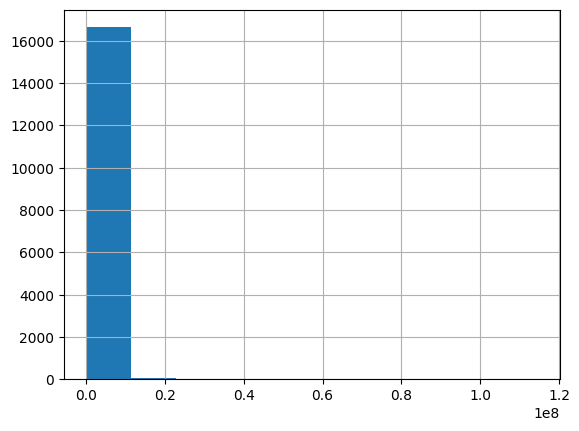

In [78]:
compras_df['IMPORTE'].hist()

####v. Generar un histograma de los valores de la columna 'IMPORTE' filtrando previamente los importes que se encuentran por debajo del percentil 95

<Axes: >

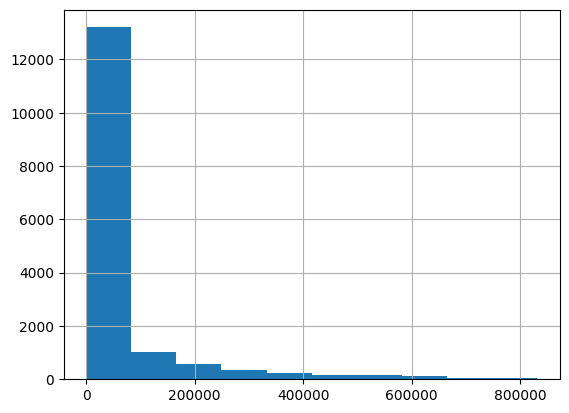

In [79]:
#Quita los importes por arriba del percentil 95%
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

####vi. Dividir el gráfico anterior en 30 intervalos.

<Axes: >

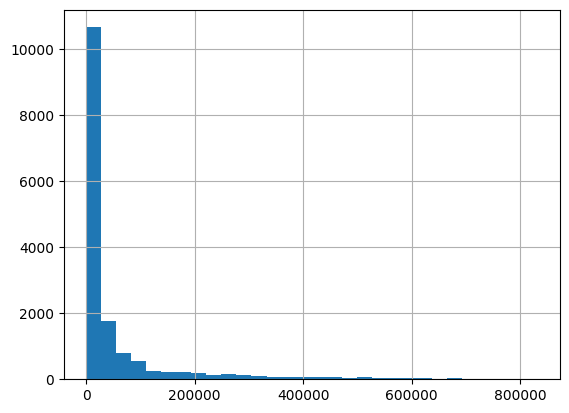

In [80]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)

In [81]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].head(5)

,IMPORTE
0,23.20
1,394.40
2,394.40
3,295.80
4,6.96


####vii. Realice además dos análisis adicionales de dos variables.


#####Variable CONCEPTO

In [82]:
#columna CONCEPTO (10 valores iniciales)
compras_df['CONCEPTO'].value_counts().iloc[0:10]

,count
CONCEPTO,
FINIQ. POR TERM. DE REL.LAB.,1134
INDEMNIZACION DE DAÑOS A VEHICULOS PARTICULARES POR DEFICIENCIAS EN VIAS PUBLICAS,273
AUTORIZACION DE ORDENES DE TRABAJO DE MANTENIMIENTO VEHICULAR EJERCICIO 2015,273
SERVICIO DE MANTENIMIENTO EXTERNO A VEHICULOS DE LAS DIFERENTES DEPENDENCIAS MUNICIPALES (OFICIO DPP,268
MANTENIMIENTO VEHICULAR,202
AUTORIZACION DEL SERVICIO DE MANTENIMIENTO DE VEHICULOS DEL EJERCICIO 2015 DE LA SECRETARIA DE SEGUR,181
AUTORIZACION DE LA SUFICIENCIA PRESUPUESTAL PARA EL EJERCICIO 2016 POR EL SERVICIO DE MANTENIMIENTO,156
MANTENIMIENTO DEVEHICULOS,153
"SUMINISTRO DE TRATAMIENTOS MEDICOS PARA LA HEMODIALISIS, PARA EL PROGRAMA DE APOYOS MEDICO-ASISTENCIAL QUE TIENE EL DIF MUNICIPAL EN 2016.",139


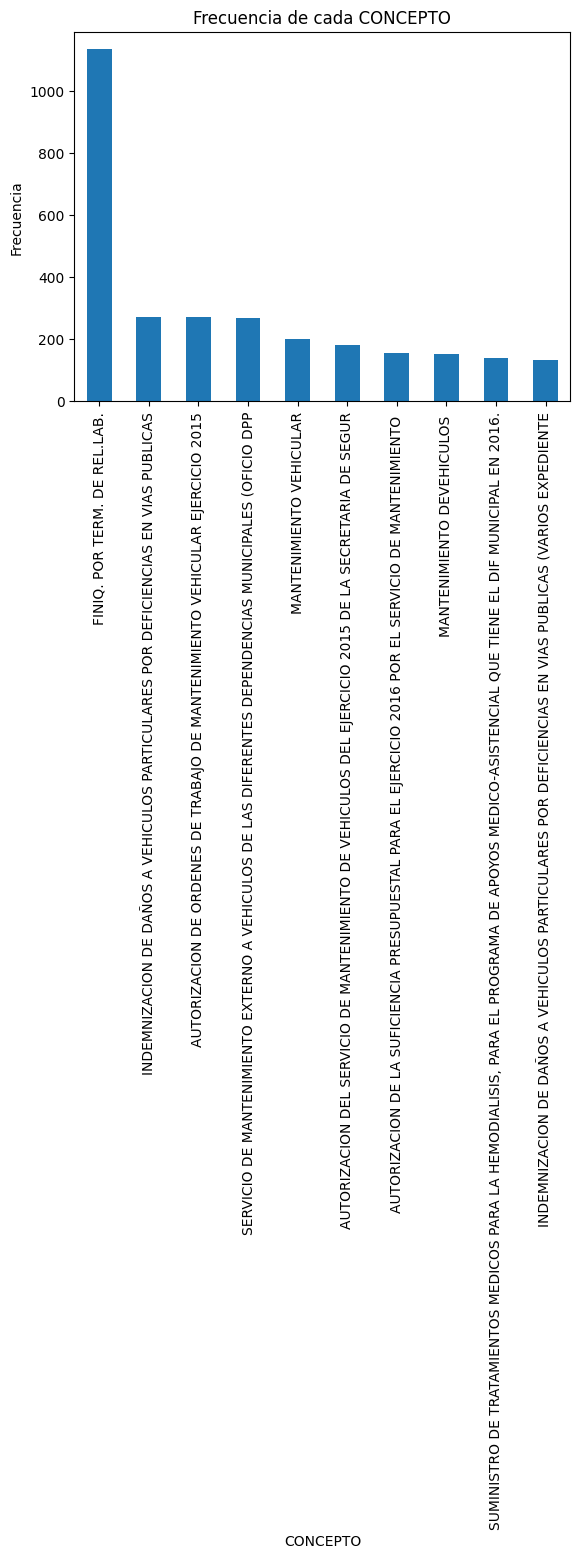

In [83]:
# Contar las ocurrencias de cada concepto (10 primeras ocurrencias)
import matplotlib.pyplot as plt
conteo_concepto = compras_df['CONCEPTO'].value_counts().iloc[0:10]

# Crear gráfico de barras
conteo_concepto.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Frecuencia de cada CONCEPTO')
plt.xlabel('CONCEPTO')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

#####variable SHEET

In [84]:
#columna SHEET (HOJA)
compras_df['SHEET'].value_counts()

,count
SHEET,
GASTOS VARIOS,12678
SERVICIOS PERSONALES,2129
CONTRATISTAS,820
COMUNICACION,567
SERVICIOS PROFESIONALES,346
GASTOS REPRESENTACION,198


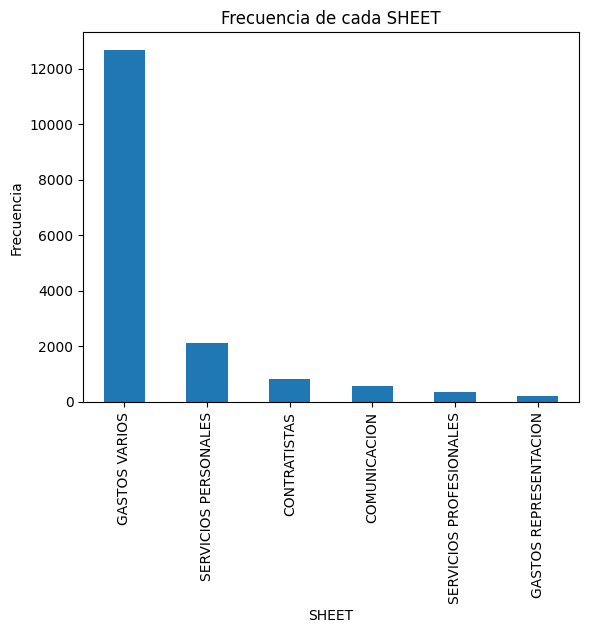

In [85]:
# Contar las ocurrencias de cada 'SHEET' (Hoja)
import matplotlib.pyplot as plt
conteo_sheet = compras_df['SHEET'].value_counts()

# Crear gráfico de barras
conteo_sheet.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Frecuencia de cada SHEET')
plt.xlabel('SHEET')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

###c. Análisis multidimensional de las variables

####i. Identificar los proveedores o beneficiarios con mayor carga económica.

In [86]:
#Primero agrupamos los datos por la columna NOMBRE y sumamos los IMPORTES
sum_importe_beneficiario=compras_df.groupby('NOMBRE').sum()['IMPORTE'].sort_values(ascending=False)

In [87]:
sum_importe_beneficiario.head(5)

,IMPORTE
NOMBRE,
MUNICIPIO DE LA CIUDAD DE MONTERREY,1.781319e+09
"RED RECOLECTOR, S.A. DE C.V.",1.756622e+08
S.U.T.S.M.M.,1.574727e+08
"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A. DE C.V.",1.543164e+08
COMISION FEDERAL DE ELECTRICIDAD,1.543012e+08


<Axes: xlabel='NOMBRE'>

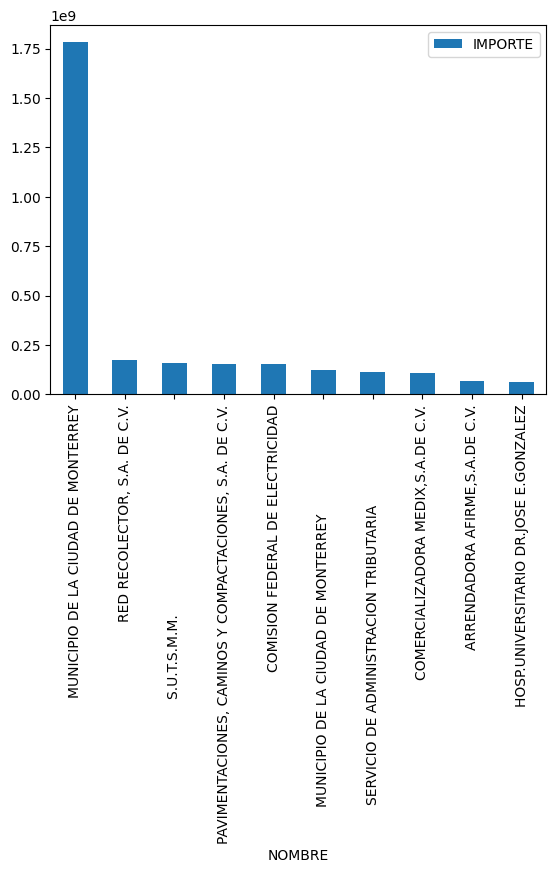

In [88]:
#graficamos los 10 primeros beneficiarios
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='NOMBRE', y='IMPORTE')

####ii. Determinar el gasto promedio por cada categoría o por hoja de Excel

In [89]:
#variable que contendrá el promedio de c/u de las hojas
mean_importe_sheet=compras_df.groupby('SHEET')['IMPORTE'].mean()

In [90]:
mean_importe_sheet

,IMPORTE
SHEET,
COMUNICACION,54423.749788
CONTRATISTAS,681126.217976
GASTOS REPRESENTACION,7614.050000
GASTOS VARIOS,313543.451327
SERVICIOS PERSONALES,58282.979986
SERVICIOS PROFESIONALES,138920.528064


<Axes: xlabel='SHEET'>

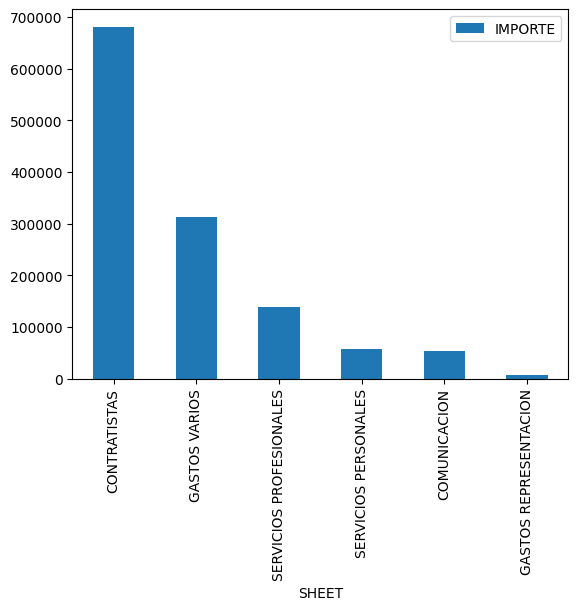

In [91]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).plot(kind='bar', x='SHEET', y='IMPORTE')

####iii. Determinar los gastos por fecha

In [92]:
sum_importe_fecha=compras_df.groupby('FECHA').sum()['IMPORTE']

In [93]:
sum_importe_fecha

,IMPORTE
FECHA,
2016-01-28 00:00:00,4.359848e+06
2016-01-29 00:00:00,1.375645e+08
2016-01-30 00:00:00,1.023005e+08
2016-02-02 00:00:00,2.700757e+06
2016-02-03 00:00:00,3.272133e+06
...,...
2016-12-27 00:00:00,1.923524e+07
2016-12-28 00:00:00,1.312165e+07
2016-12-29 00:00:00,1.227486e+07


<Axes: xlabel='FECHA'>

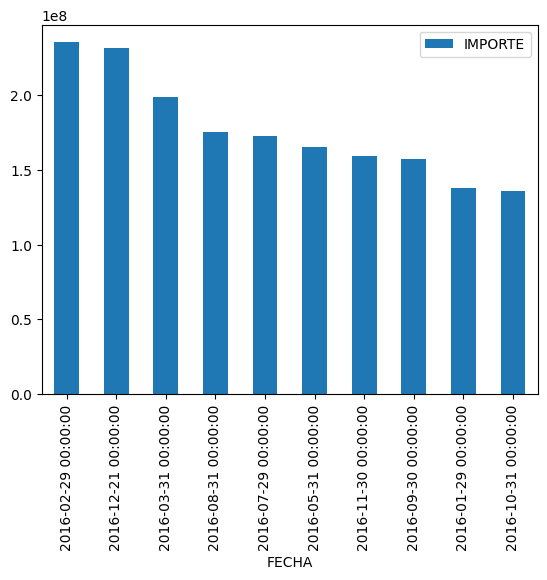

In [94]:
sum_importe_fecha.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='FECHA', y='IMPORTE')
#La fecha de mayor importe del 2016 es el 29 de febrero

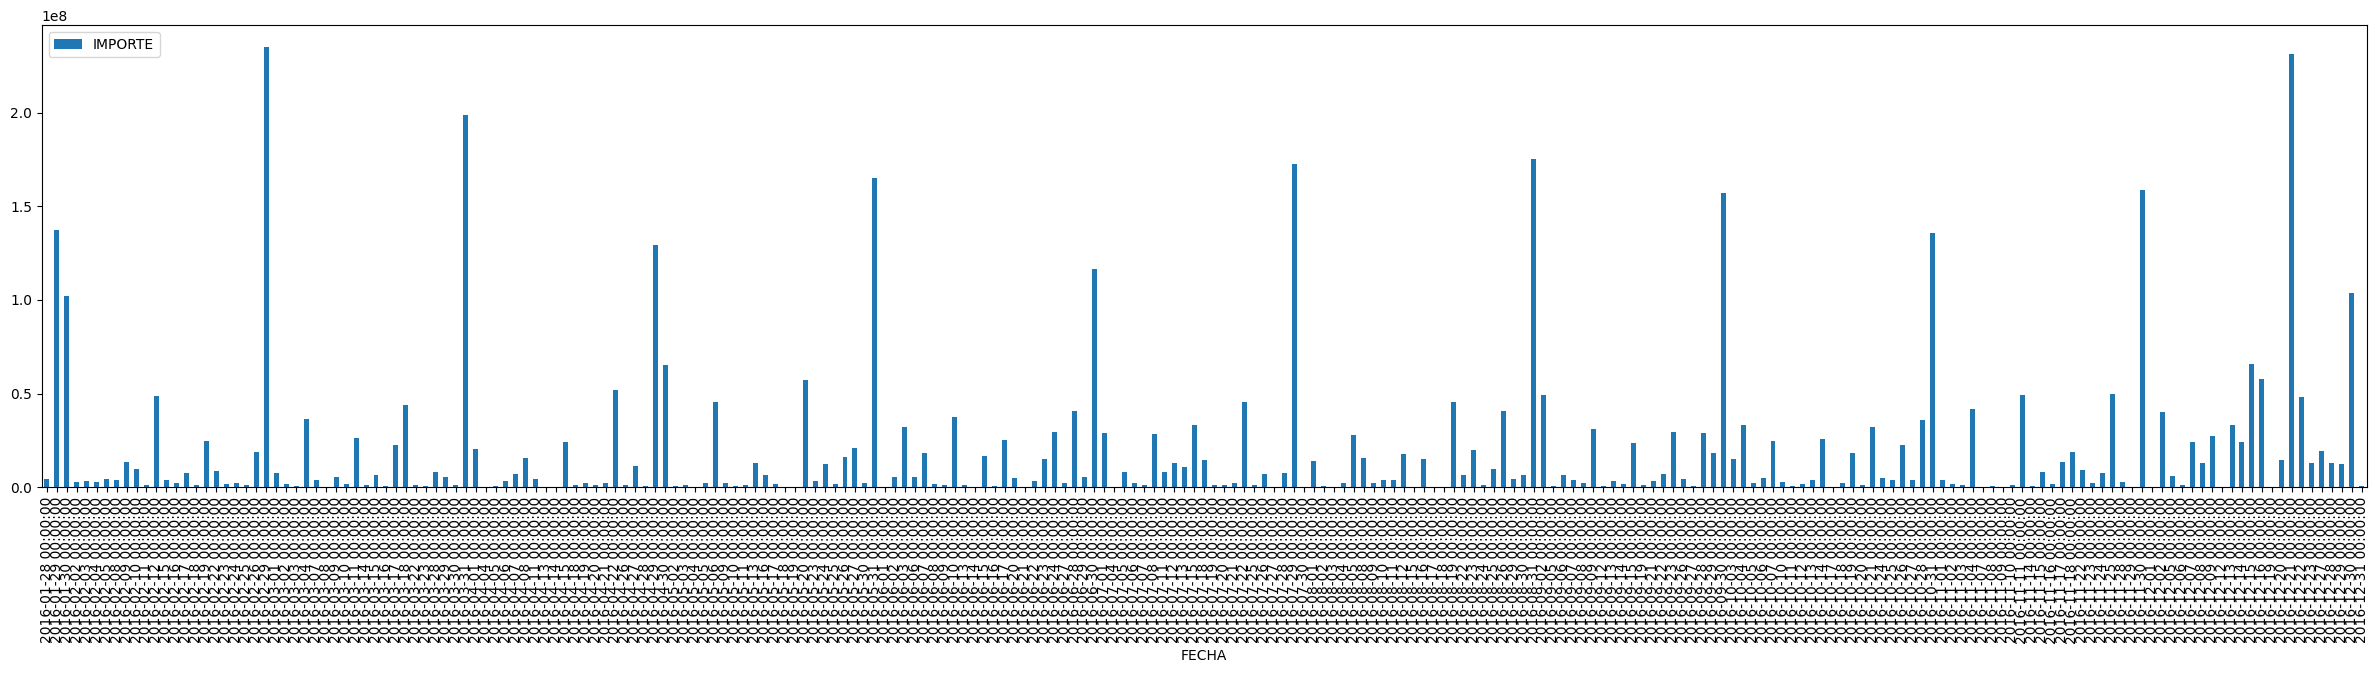

In [95]:
# Ajustar el tamaño de la figura (ancho x alto)
plt.figure(figsize=(30, 6))  # Ajusta estos valores según lo que necesites

# Generar el gráfico de barras
sum_importe_fecha.reset_index().sort_values(by="FECHA", ascending=True).plot(
    kind='bar', x="FECHA", y="IMPORTE", ax=plt.gca()
)

# Mostrar el gráfico
plt.show()

####iv. Realizar dos análisis multidimensionales adicionales.

In [96]:
#columna CONCEPTO
sum_importe_concepto=compras_df.groupby('CONCEPTO').sum()['IMPORTE'].sort_values(ascending=False)

<Axes: xlabel='CONCEPTO'>

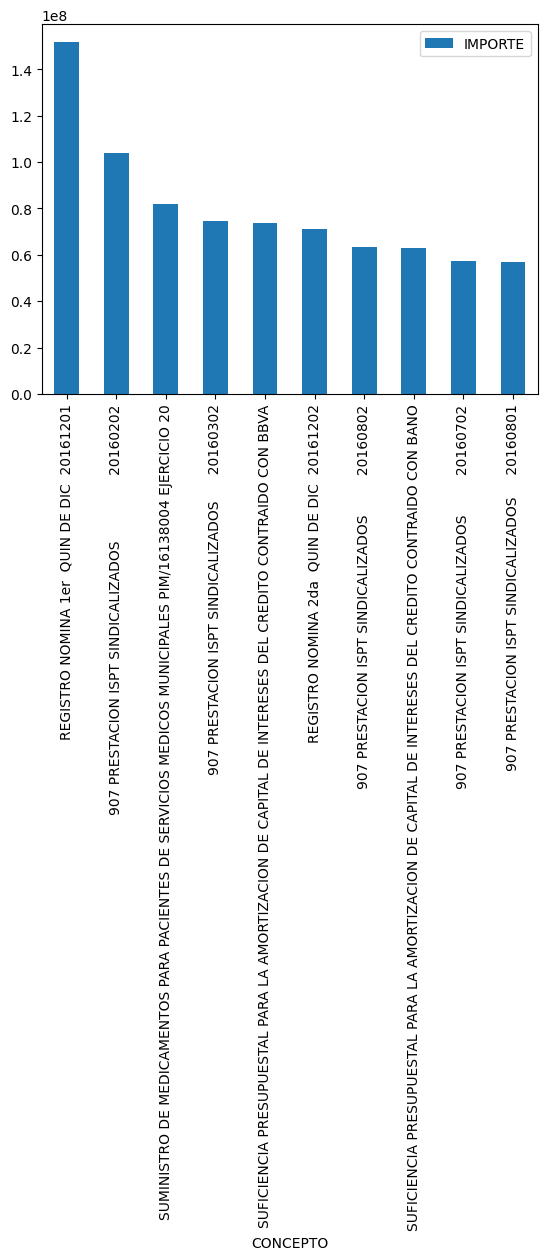

In [97]:
sum_importe_concepto.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='CONCEPTO', y='IMPORTE')

In [98]:
#columna FACTURA
sum_importe_factura=compras_df.groupby('FACTURA').sum()['IMPORTE'].sort_values(ascending=False)

<Axes: xlabel='FACTURA'>

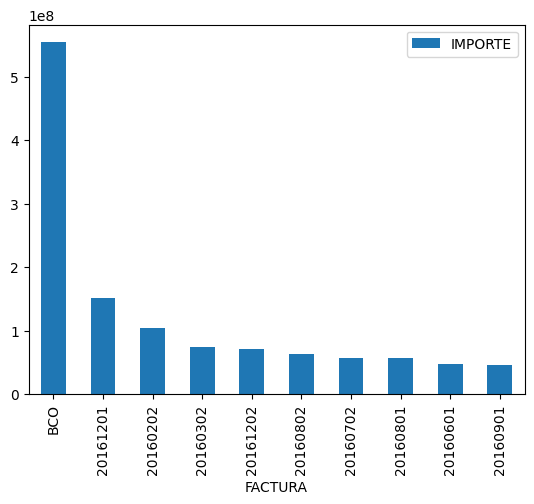

In [99]:
sum_importe_factura.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='FACTURA', y='IMPORTE')

###d. Análisis de Texto

##Palabras que más se repiten

In [100]:
import nltk
from nltk.corpus import stopwords

In [101]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [103]:
from wordcloud import WordCloud

In [104]:
texto_compras=''
for row in compras_df['CONCEPTO']:
    texto_compras=texto_compras+ ' ' + row

In [105]:
stopwords_list = stopwords.words('spanish')+['2016','BCO','suministro','registro','credito','prestacion']

In [106]:
texto_compras = ' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [107]:
wc = WordCloud(background_color='white')
wc.generate(texto_compras)

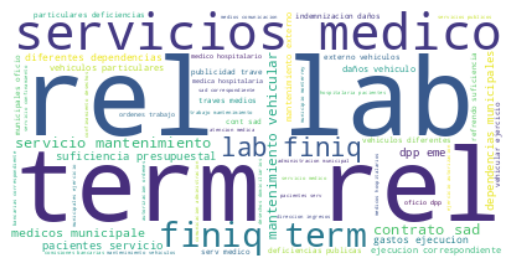

In [108]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()